In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Library yang dibutuhkan**

In [2]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [3]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Dukcapil_1.csv")
df.head()

,userName,score,at,content
0,Jaswen Daryanto,5,2024-06-12 02:03:29,Aplikasi mudah efisien. Pelayanan capil jerukl...
1,syaean tok,5,2024-06-12 01:52:33,aplikasi keren
2,Zeltha Julian,5,2024-06-12 01:52:22,"Aplikasi mudah, pelayanan Capil jeruklegi ramah"
3,ono sutrisno,5,2024-06-12 01:49:56,UPT Jeruklegi pelayanan ikd bagus
4,Dina Riyana,5,2024-06-12 01:46:06,Capil jeruklegi pelayanan bagus. Aplikasi ikd ...


In [4]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Aplikasi mudah efisien. Pelayanan capil jerukl...,Jaswen Daryanto,2024-06-12 02:03:29
1,aplikasi keren,syaean tok,2024-06-12 01:52:33
2,"Aplikasi mudah, pelayanan Capil jeruklegi ramah",Zeltha Julian,2024-06-12 01:52:22
3,UPT Jeruklegi pelayanan ikd bagus,ono sutrisno,2024-06-12 01:49:56
4,Capil jeruklegi pelayanan bagus. Aplikasi ikd ...,Dina Riyana,2024-06-12 01:46:06
...,...,...,...
995,bagus,Febrian Aditya,2024-05-06 05:10:31
996,Sangat membatu aplikasi identitas kependudukan,Cecep Sukandar,2024-05-06 05:02:06
997,"Apk gak guna,tidak bisa akses,malah kita di sa...",Andrey Hermansyah,2024-05-06 04:54:00
998,"aplikasi yg sangat susah untuk masuk, bikin or...",indra Wijaya,2024-05-06 04:48:20


In [5]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   1000 non-null   object
 1   userName  1000 non-null   object
 2   at        1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [6]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,1000,1000,1000
unique,917,999,1000
top,Mantap,Nur Hasanah,2024-06-12 02:03:29
freq,13,2,1


# **Cleaning Data & Case Folding**

In [7]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(1000, 3)

In [8]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [9]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [10]:
# Menghapus data yang kosong
df = df.dropna()

In [11]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [12]:
df.shape

(917, 3)

In [13]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [14]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [15]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,aplikasi mudah efisien pelayanan capil jerukle...,Jaswen Daryanto,2024-06-12 02:03:29
1,aplikasi keren,syaean tok,2024-06-12 01:52:33
2,aplikasi mudah pelayanan capil jeruklegi ramah,Zeltha Julian,2024-06-12 01:52:22
3,upt jeruklegi pelayanan ikd bagus,ono sutrisno,2024-06-12 01:49:56
4,capil jeruklegi pelayanan bagus aplikasi ikd g...,Dina Riyana,2024-06-12 01:46:06
...,...,...,...
994,aplikasi nya ngga berguna buat apah apah,Anjjanni Ravenaa,2024-05-06 05:11:17
996,sangat membatu aplikasi identitas kependudukan,Cecep Sukandar,2024-05-06 05:02:06
997,apk gak gunatidak bisa aksesmalah kita di sala...,Andrey Hermansyah,2024-05-06 04:54:00
998,aplikasi yg sangat susah untuk masuk bikin org...,indra Wijaya,2024-05-06 04:48:20


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,aplikasi mudah efisien pelayanan capil jerukle...,Jaswen Daryanto,2024-06-12 02:03:29
1,aplikasi keren,syaean tok,2024-06-12 01:52:33
2,aplikasi mudah pelayanan capil jeruklegi ramah,Zeltha Julian,2024-06-12 01:52:22
3,upt jeruklegi pelayanan ikd bagus,ono sutrisno,2024-06-12 01:49:56
4,capil jeruklegi pelayanan bagus aplikasi ikd g...,Dina Riyana,2024-06-12 01:46:06
...,...,...,...
994,aplikasi nya ngga berguna buat apah apah,Anjjanni Ravenaa,2024-05-06 05:11:17
996,sangat membatu aplikasi identitas kependudukan,Cecep Sukandar,2024-05-06 05:02:06
997,aplikasi tidak gunatidak bisa aksesmalah kita ...,Andrey Hermansyah,2024-05-06 04:54:00
998,aplikasi yang sangat susah untuk masuk bikin o...,indra Wijaya,2024-05-06 04:48:20


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 779.8 kB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,aplikasi mudah efisien pelayanan capil jerukle...,Jaswen Daryanto,2024-06-12 02:03:29
1,aplikasi keren,syaean tok,2024-06-12 01:52:33
2,aplikasi mudah pelayanan capil jeruklegi ramah,Zeltha Julian,2024-06-12 01:52:22
3,upt jeruklegi pelayanan ikd bagus,ono sutrisno,2024-06-12 01:49:56
4,capil jeruklegi pelayanan bagus aplikasi ikd g...,Dina Riyana,2024-06-12 01:46:06
...,...,...,...
994,aplikasi nya ngga berguna buat apah apah,Anjjanni Ravenaa,2024-05-06 05:11:17
996,sangat membatu aplikasi identitas kependudukan,Cecep Sukandar,2024-05-06 05:02:06
997,aplikasi gunatidak aksesmalah di salahkan jari...,Andrey Hermansyah,2024-05-06 04:54:00
998,aplikasi sangat susah masuk bikin org sbar men...,indra Wijaya,2024-05-06 04:48:20


In [19]:
# 3. Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [aplikasi, mudah, efisien, pelayanan, capil, j...
1                                      [aplikasi, keren]
2      [aplikasi, mudah, pelayanan, capil, jeruklegi,...
3                [upt, jeruklegi, pelayanan, ikd, bagus]
4      [capil, jeruklegi, pelayanan, bagus, aplikasi,...
                             ...                        
994     [aplikasi, nya, ngga, berguna, buat, apah, apah]
996    [sangat, membatu, aplikasi, identitas, kependu...
997    [aplikasi, gunatidak, aksesmalah, di, salahkan...
998    [aplikasi, sangat, susah, masuk, bikin, org, s...
999    [kerja, nya, cepat, bagus, ktp, langsung, jadi...
Name: content, Length: 917, dtype: object

In [20]:
# 4. Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Dukcapil_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Dukcapil_1.csv', encoding = 'latin1')
df_clean

,content
0,aplikasi mudah efisien layan capil jeruklegi r...
1,aplikasi keren
2,aplikasi mudah layan capil jeruklegi ramah
3,upt jeruklegi layan ikd bagus
4,capil jeruklegi layan bagus aplikasi ikd gampang
...,...
912,aplikasi nya ngga guna buat apah apah
913,sangat batu aplikasi identitas duduk
914,aplikasi gunatidak aksesmalah di salah jaringa...
915,aplikasi sangat susah masuk bikin org sbar tunggu


# **Translate**

In [22]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 601.8 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-p

In [23]:
import pandas as pd
from easynmt import EasyNMT

In [24]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Dukcapil_1.csv', encoding='latin1')

In [25]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [26]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 14.6MB/s]                   


In [27]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,aplikasi mudah efisien layan capil jeruklegi r...
1,aplikasi keren
2,aplikasi mudah layan capil jeruklegi ramah
3,upt jeruklegi layan ikd bagus
4,capil jeruklegi layan bagus aplikasi ikd gampang
...,...
912,aplikasi nya ngga guna buat apah apah
913,sangat batu aplikasi identitas duduk
914,aplikasi gunatidak aksesmalah di salah jaringa...
915,aplikasi sangat susah masuk bikin org sbar tunggu


In [28]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Dukcapil_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Dukcapil_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,aplikasi mudah efisien layan capil jeruklegi r...,easily efficient application layan orange leaf...
1,1,aplikasi keren,Cool app.
2,2,aplikasi mudah layan capil jeruklegi ramah,easily laid application orange-length caps are...
3,3,upt jeruklegi layan ikd bagus,nice ikd laye upt
4,4,capil jeruklegi layan bagus aplikasi ikd gampang,good layout caple app ikd easy
...,...,...,...
912,912,aplikasi nya ngga guna buat apah apah,It's no use to do anything.
913,913,sangat batu aplikasi identitas duduk,very stone identity application sit
914,914,aplikasi gunatidak aksesmalah di salah jaringa...,use no accessal applications on misconnection ...
915,915,aplikasi sangat susah masuk bikin org sbar tunggu,The apps are hard to get into. Wait a minute.


# **Labeling**

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Dukcapil_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,aplikasi mudah efisien layan capil jeruklegi r...,easily efficient application layan orange leaf...
1,1,aplikasi keren,Cool app.
2,2,aplikasi mudah layan capil jeruklegi ramah,easily laid application orange-length caps are...
3,3,upt jeruklegi layan ikd bagus,nice ikd laye upt
4,4,capil jeruklegi layan bagus aplikasi ikd gampang,good layout caple app ikd easy
...,...,...,...
912,912,aplikasi nya ngga guna buat apah apah,It's no use to do anything.
913,913,sangat batu aplikasi identitas duduk,very stone identity application sit
914,914,aplikasi gunatidak aksesmalah di salah jaringa...,use no accessal applications on misconnection ...
915,915,aplikasi sangat susah masuk bikin org sbar tunggu,The apps are hard to get into. Wait a minute.


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 356
Netral = 365
Negatif = 196

Total Data Seluruhnya : 917


In [34]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,aplikasi mudah efisien layan capil jeruklegi r...,easily efficient application layan orange leaf...,Positif
1,1,aplikasi keren,Cool app.,Positif
2,2,aplikasi mudah layan capil jeruklegi ramah,easily laid application orange-length caps are...,Positif
3,3,upt jeruklegi layan ikd bagus,nice ikd laye upt,Positif
4,4,capil jeruklegi layan bagus aplikasi ikd gampang,good layout caple app ikd easy,Positif
...,...,...,...,...
912,912,aplikasi nya ngga guna buat apah apah,It's no use to do anything.,Netral
913,913,sangat batu aplikasi identitas duduk,very stone identity application sit,Positif
914,914,aplikasi gunatidak aksesmalah di salah jaringa...,use no accessal applications on misconnection ...,Netral
915,915,aplikasi sangat susah masuk bikin org sbar tunggu,The apps are hard to get into. Wait a minute.,Negatif


In [35]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,aplikasi mudah efisien layan capil jeruklegi r...,easily efficient application layan orange leaf...,Positif
1,aplikasi keren,Cool app.,Positif
2,aplikasi mudah layan capil jeruklegi ramah,easily laid application orange-length caps are...,Positif
3,upt jeruklegi layan ikd bagus,nice ikd laye upt,Positif
4,capil jeruklegi layan bagus aplikasi ikd gampang,good layout caple app ikd easy,Positif
...,...,...,...
912,aplikasi nya ngga guna buat apah apah,It's no use to do anything.,Netral
913,sangat batu aplikasi identitas duduk,very stone identity application sit,Positif
914,aplikasi gunatidak aksesmalah di salah jaringa...,use no accessal applications on misconnection ...,Netral
915,aplikasi sangat susah masuk bikin org sbar tunggu,The apps are hard to get into. Wait a minute.,Negatif


# **Visualisasi**


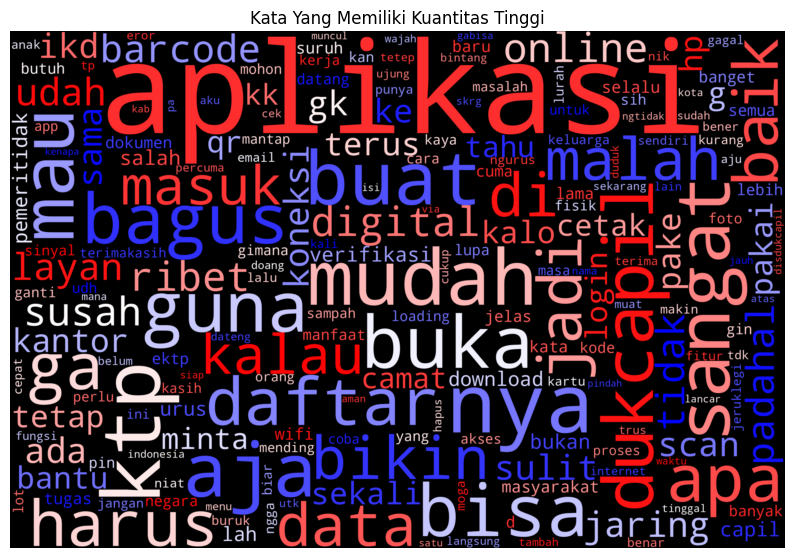

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


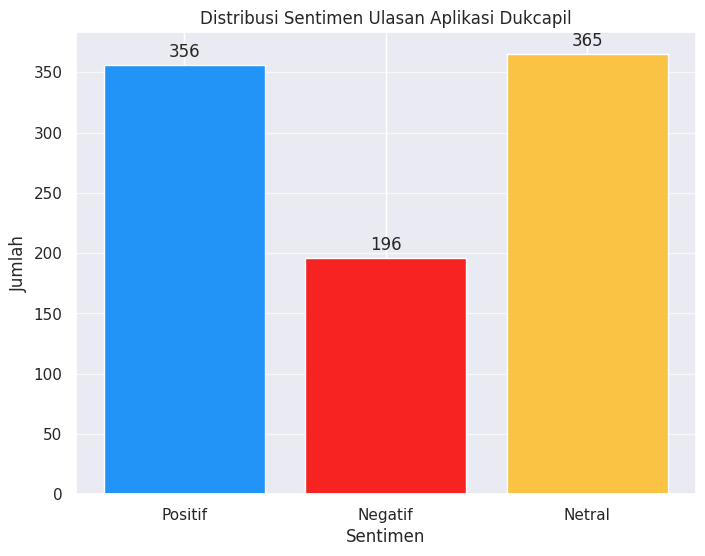

In [37]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Dukcapil")


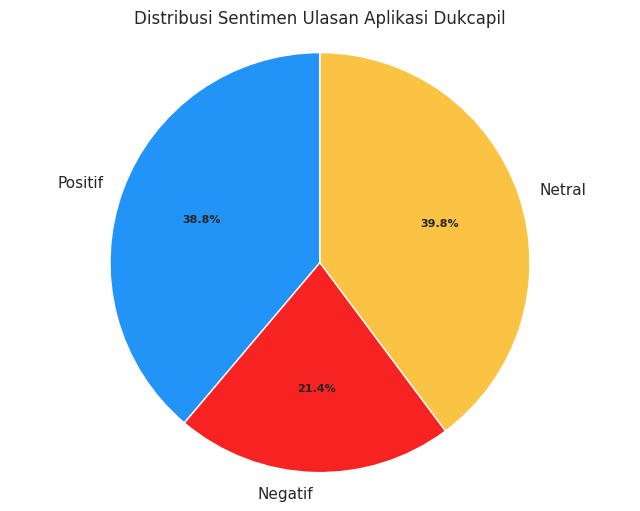

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Dukcapil")

In [39]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,aplikasi mudah efisien layan capil jeruklegi r...,easily efficient application layan orange leaf...,Positif
1,aplikasi keren,Cool app.,Positif
2,aplikasi mudah layan capil jeruklegi ramah,easily laid application orange-length caps are...,Positif
3,upt jeruklegi layan ikd bagus,nice ikd laye upt,Positif
4,capil jeruklegi layan bagus aplikasi ikd gampang,good layout caple app ikd easy,Positif
...,...,...,...
907,mau marah ya lah dasar cacad sistem aplikasi n...,"fontcolor="" # FFFF00""want tobe mad fontcolor=""...",Negatif
910,benar untuk mudah apa gimana sih mau masuk sus...,Right. To make it easy. How hard can it be to ...,Positif
913,sangat batu aplikasi identitas duduk,very stone identity application sit,Positif
915,aplikasi sangat susah masuk bikin org sbar tunggu,The apps are hard to get into. Wait a minute.,Negatif


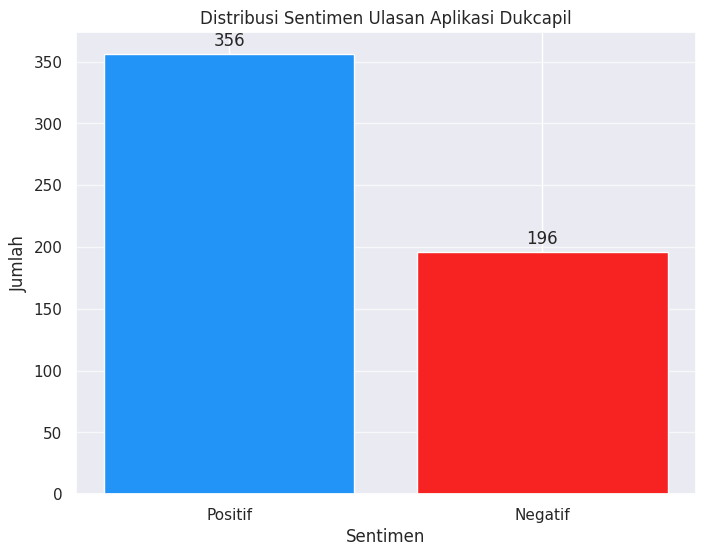

In [40]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Dukcapil")


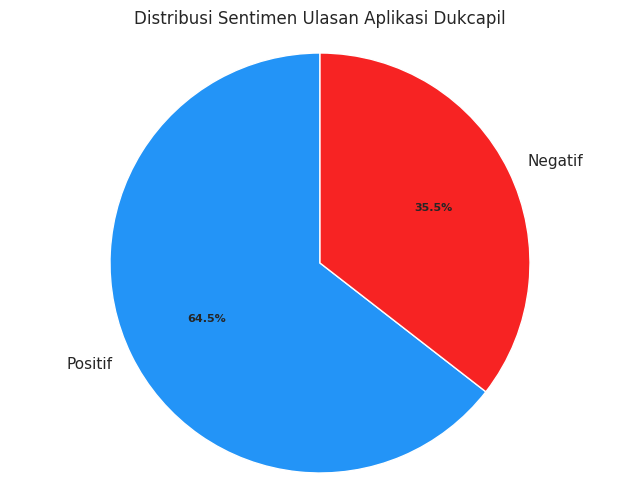

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Dukcapil")

In [42]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,aplikasi mudah efisien layan capil jeruklegi r...,easily efficient application layan orange leaf...,1
1,aplikasi keren,Cool app.,1
2,aplikasi mudah layan capil jeruklegi ramah,easily laid application orange-length caps are...,1
3,upt jeruklegi layan ikd bagus,nice ikd laye upt,1
4,capil jeruklegi layan bagus aplikasi ikd gampang,good layout caple app ikd easy,1
...,...,...,...
907,mau marah ya lah dasar cacad sistem aplikasi n...,"fontcolor="" # FFFF00""want tobe mad fontcolor=""...",0
910,benar untuk mudah apa gimana sih mau masuk sus...,Right. To make it easy. How hard can it be to ...,1
913,sangat batu aplikasi identitas duduk,very stone identity application sit,1
915,aplikasi sangat susah masuk bikin org sbar tunggu,The apps are hard to get into. Wait a minute.,0


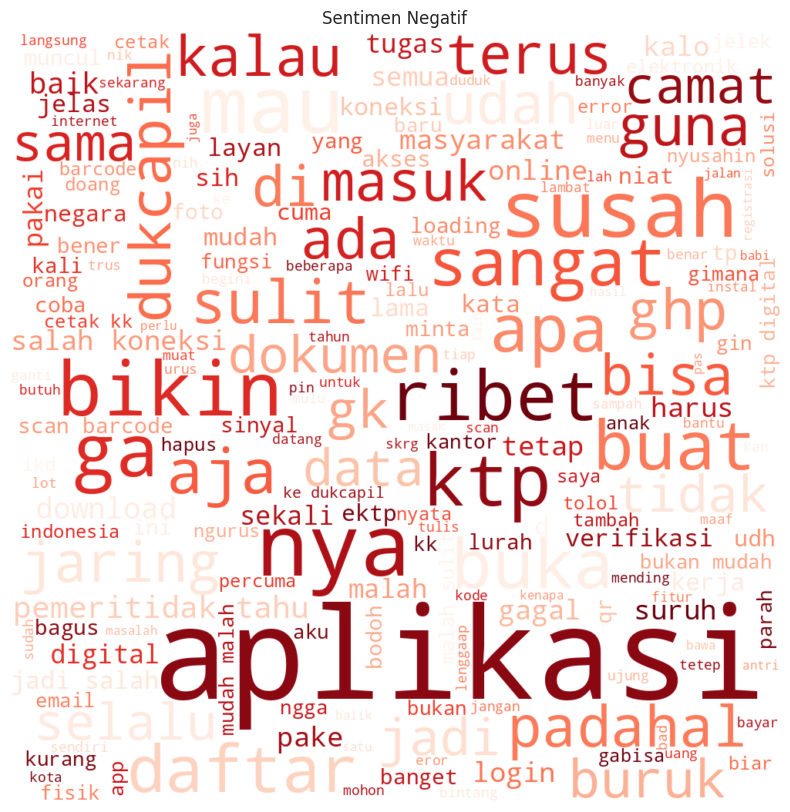

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

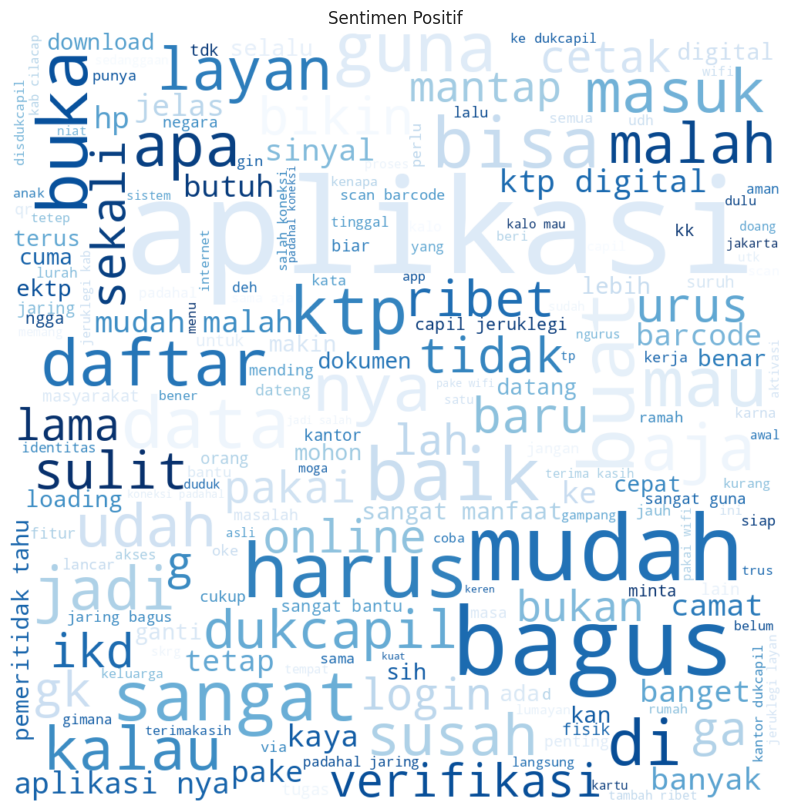

In [44]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [45]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif
data['sentimen'].value_counts()

sentimen
1    356
0    196
Name: count, dtype: int64

# **Data Preparation**

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [48]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [49]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

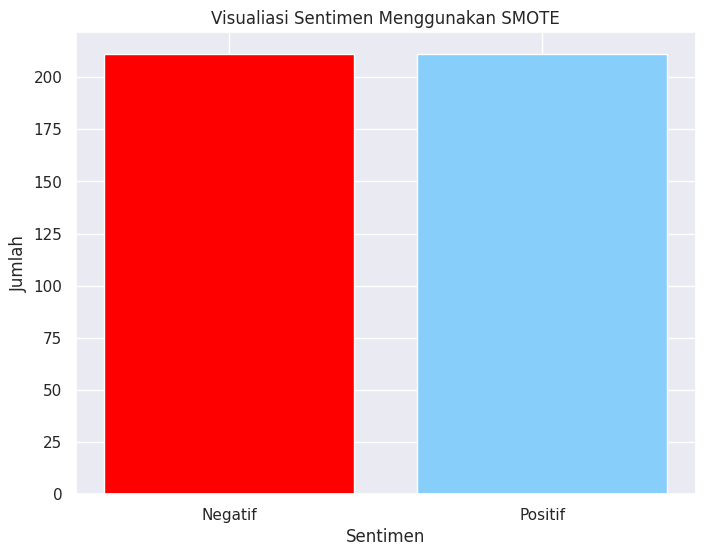

In [50]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Modeling**


In [51]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [52]:
y_pred = naive_bayes.predict(X_test_vec)

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7239819004524887

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.58      0.70      0.63        76
     Positif       0.82      0.74      0.78       145

    accuracy                           0.72       221
   macro avg       0.70      0.72      0.71       221
weighted avg       0.74      0.72      0.73       221



In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives (TN) = ', cm[0, 0])

print('\nTrue Positives (TP) = ', cm[1, 1])

print('\nFalse Negatives (FN) = ', cm[0, 1])

print('\nFalse Positives (FP) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 53  23]
 [ 38 107]]

True Negatives (TN) =  53

True Positives (TP) =  107

False Negatives (FN) =  23

False Positives (FP) =  38

Accuracy =  0.7239819004524887


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

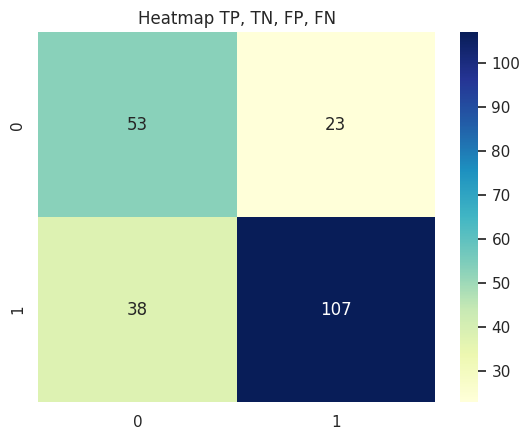

In [56]:
cm_matrix = pd.DataFrame(data=cm, columns=['0', '1'],
                         index=['0', '1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [57]:
# Classification Accuracy

TN = cm[0,0]
TP = cm[1,1]
FN = cm[0,1]
FP = cm[1,0]

In [58]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7240


In [59]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2760


# **Testing**


In [60]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : bagus banget
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 87.13%
Probabilitas: 87.13277679419087 %


In [61]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : ribet bgt
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 71.67%
Probabilitas: 71.674328933709 %
